In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso


# Load the dataset

In [30]:
df = pd.read_csv(r"C:/Users/disha/Downloads/MLR/MLR/ToyotaCorolla - MLR.csv")
print(df)

      Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3  

# Display the first few rows of the dataset

In [39]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


# Summary statistics

In [40]:
print(df.describe(include='all'))

               Price    Age_08_04             KM Fuel_Type           HP  \
count    1436.000000  1436.000000    1436.000000      1436  1436.000000   
unique           NaN          NaN            NaN         3          NaN   
top              NaN          NaN            NaN    Petrol          NaN   
freq             NaN          NaN            NaN      1264          NaN   
mean    10730.824513    55.947075   68533.259749       NaN   101.502089   
std      3626.964585    18.599988   37506.448872       NaN    14.981080   
min      4350.000000     1.000000       1.000000       NaN    69.000000   
25%      8450.000000    44.000000   43000.000000       NaN    90.000000   
50%      9900.000000    61.000000   63389.500000       NaN   110.000000   
75%     11950.000000    70.000000   87020.750000       NaN   110.000000   
max     32500.000000    80.000000  243000.000000       NaN   192.000000   

          Automatic           cc        Doors  Cylinders        Gears  \
count   1436.000000   1436

# Pairplot to visualize relationships

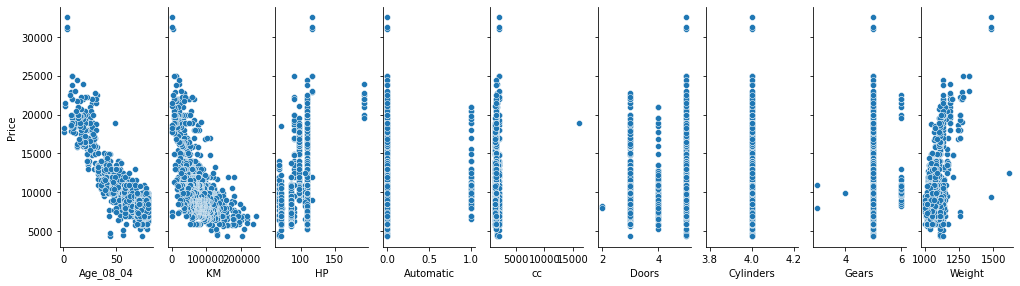

In [97]:
sns.pairplot(df, x_vars=['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears','Weight'], 
             y_vars='Price', height=4, aspect=0.4)
plt.show()

# Correlation matrix

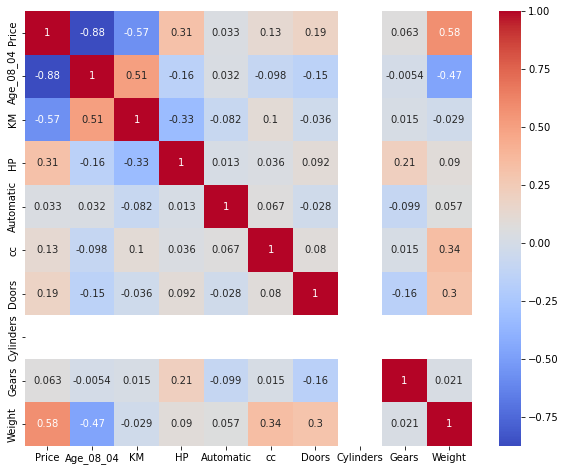

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [104]:
print(df.dtypes)


Price        int64
Age_08_04    int64
KM           int64
Fuel_Type    int64
HP           int64
Automatic    int64
cc           int64
Doors        int64
Cylinders    int64
Gears        int64
Weight       int64
dtype: object


In [102]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'FuelType':  
        df[col] = pd.factorize(df[col])[0]

In [103]:
print(df.head())

   Price  Age_08_04     KM  Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986          0  90          0  2000      3          4   
1  13750         23  72937          0  90          0  2000      3          4   
2  13950         24  41711          0  90          0  2000      3          4   
3  14950         26  48000          0  90          0  2000      3          4   
4  13750         30  38500          0  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


# Check for missing values

In [55]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

# Spliting the dataset into training and testing sets (80% training, 20% testing)

In [83]:
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1148, 10) (1148,)
Testing set shape: (288, 10) (288,)


# interpreting features for Linear Regression with all features

In [86]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

coefficients_model1 = pd.DataFrame({'Variable': X.columns, 'Coefficient': model1.coef_})
print("Model 1 - Linear Regression with All Features:")
print(coefficients_model1)


Model 1 - Linear Regression with All Features:
    Variable   Coefficient
0  Age_08_04 -1.204057e+02
1         KM -1.973557e-02
2  Fuel_Type  2.864182e+02
3         HP  2.399167e+01
4  Automatic  3.225155e+02
5         cc -9.090327e-02
6      Doors -3.995868e+00
7  Cylinders  2.302158e-12
8      Gears  6.433114e+02
9     Weight  2.101509e+01


# interpreting the features for Linear Regression with a subset of features

In [96]:
subset_features_model2 = ['Age_08_04', 'KM', 'HP']
X_train_subset_model2 = X_train[subset_features_model2]
X_test_subset_model2 = X_test[subset_features_model2]
model2 = LinearRegression()
model2.fit(X_train_subset_model2, y_train)

coefficients_model2 = pd.DataFrame({'Variable': subset_features_model2, 'Coefficient': model2.coef_})
print("\nModel 2 - Linear Regression with Subset of Features:")
print(coefficients_model2)


Model 2 - Linear Regression with Subset of Features:
    Variable  Coefficient
0  Age_08_04  -153.696216
1         KM    -0.011313
2         HP    34.671966


# interpreting the features for Polynomial Regression with a subset of features

In [95]:
poly_features = PolynomialFeatures(degree=2) 
X_train_poly_model3 = poly_features.fit_transform(X_train[subset_features_model2])
X_test_poly_model3 = poly_features.transform(X_test[subset_features_model2])
poly_model = LinearRegression()
poly_model.fit(X_train_poly_model3, y_train)

poly_columns_model3 = poly_features.get_feature_names(input_features=subset_features_model2)
coefficients_poly_model3 = pd.DataFrame({'Variable': poly_columns_model3, 'Coefficient': poly_model.coef_})
print("\nModel 3 - Polynomial Regression with Subset of Features:")
print(coefficients_poly_model3)


Model 3 - Polynomial Regression with Subset of Features:
       Variable   Coefficient
0             1  0.000000e+00
1     Age_08_04 -2.686387e+02
2            KM  3.443005e-02
3            HP  5.899957e+01
4   Age_08_04^2  1.862245e+00
5  Age_08_04 KM  5.800698e-05
6  Age_08_04 HP -6.851952e-01
7          KM^2 -1.209659e-07
8         KM HP -2.891244e-04
9          HP^2  1.259018e-01


C:\Users\disha\Documents\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Evaluating the performance of the model 

In [94]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2003716.1619778126
Mean Absolute Error (MAE): 993.607660610101
R-squared (R2): 0.8498277844722372


# Lasso Regression

In [93]:
lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
print("Lasso Regression RMSE:", lasso_rmse)

Lasso Regression RMSE: 1415.451110777195


# Ridge Regression

In [92]:
ridge_model = Ridge(alpha=0.1) 
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
print("Ridge Regression RMSE:", ridge_rmse)

Ridge Regression RMSE: 1415.511184745906


The relationship between predictors and the target variable is linear. If violated, the model may give biased estimates and unreliable predictions.
Errors are independent, with no correlation between consecutive residuals..
Homoscedasticity: Assumes constant error variance across predictor variables. If not met, biased standard errors may affect statistical inference reliability.

No Multicollinearity: Assumes no high correlation among predictors. Violation can inflate standard errors, render variables insignificant, and complicate interpretation.
.
